# Fallback Table Metalearning ASSIGNMENT


In [1]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

In [2]:
# install.packages("pkgcond")

In [3]:
library(dplyr)
library(data.table)
library(partykit)
library(tictoc)
library(caret)
library(e1071)
library(randomForest)
library(ranger)

#for 3d plotting
library(akima)
library(plotly)

# for prep data
library(stringr)
library(pbapply)
library(stringdist)
library(data.table)
library(dominanceanalysis)


getwd()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: lattice

Loading required package: ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:sta

[1] "/home/jupyter/Domains_202003/scripts/phaseII_06_fallbacksupp"

In [4]:

source('../orig/functions.R')

source('../orig/functions_models.R')

source('../phaseII_03_forest/functions_eval.R')



Attaching package: ‘tidyr’


The following object is masked from ‘package:stringdist’:

    extract




In [5]:
source('functions_metalearning.R')

In [6]:
source('functions_fallback.R')

In [7]:
# source('load_prep_data_expiry_2.R') #read in train test and predictions manually instead

# READ CSV's
# expiry_df_test_preds <- read.csv("../../data/output/datapull_20201116/expiry_df_test_preds.csv")
expiry_df_train <- read.csv("../../data/output/datapull_20201116/expiry_df_train.csv")
# expiry_df_test <- read.csv("../../data/output/datapull_20201116/expiry_df_test.csv")
metametrics_df <- read.csv("../../data/output/datapull_20201116/expiry_metametrics_df.csv")
# expiry_df
# expiry_train_df 
# expiry_test_df 
# expiry_list
# expiry_train_list
# expiry_test_list

# Chosen models and metrics:

3 models: agg_rf_ALL, seg2_glm and seg_glm_fb
metric: l10 lift
model: random forest rebalanced

# PREP data

## Add win flags

In [8]:
(auc_vars = c('auc_seg2_glm','auc_agg_rf_ALL','auc_seg2_glm_fb'))
(l10_vars = c('l10_seg2_glm','l10_agg_rf_ALL','l10_seg2_glm_fb'))

metametrics_df <- metametrics_df %>%
    mutate (auc_win_04=sapply(apply(.[,c(auc_vars)], 
                          1, function(x) names(x)[which.max(x)]) , function(s) if (length(s) == 0) NA else paste(s, collapse = " ")) ,
            l10_win_04=sapply(apply(.[,c(l10_vars)], 
                          1, function(x) names(x)[which.max(x)]), function(s) if (length(s) == 0) NA else paste(s, collapse = " ")) 
            ) 

[1] "auc_seg2_glm"    "auc_agg_rf_ALL"  "auc_seg2_glm_fb"

[1] "l10_seg2_glm"    "l10_agg_rf_ALL"  "l10_seg2_glm_fb"

In [9]:
as.data.frame(sort(table(metametrics_df$auc_win_04), decreasing=TRUE))
as.data.frame(sort(table(metametrics_df$l10_win_04), decreasing=TRUE))
as.data.frame(sort(prop.table(table(metametrics_df$auc_win_04)), decreasing=TRUE))
as.data.frame(sort(prop.table(table(metametrics_df$l10_win_04)), decreasing=TRUE))

Var1,Freq
<fct>,<int>
auc_seg2_glm,715
auc_agg_rf_ALL,609
auc_seg2_glm_fb,158


Var1,Freq
<fct>,<int>
l10_seg2_glm,939
l10_agg_rf_ALL,457
l10_seg2_glm_fb,86


Var1,Freq
<fct>,<dbl>
auc_seg2_glm,0.4824561
auc_agg_rf_ALL,0.4109312
auc_seg2_glm_fb,0.1066127


Var1,Freq
<fct>,<dbl>
l10_seg2_glm,0.63360324
l10_agg_rf_ALL,0.30836707
l10_seg2_glm_fb,0.05802969


## missing value imputation

In [10]:
# install.packages("missRanger")
library(missRanger)

In [11]:
metametrics_imp_df <- missRanger(metametrics_df, num.trees = 100)


Missing value imputation by random forests

  Variables to impute:		geo_maj, daydom_std, daydom_skew, daydom_kurt, sldlen_std, sldlen_skew, sldlen_kurt, gibbs_std, gibbs_skew, gibbs_kurt, pdcnt_std, pdcnt_skew, pdcnt_kurt, regarpt_std, regarpt_skew, regarpt_kurt, l10_seg2_glm, l10_seg_glm, l10_agg_glm_ALL, l10_agg_glm, l10_seg2_rf, l10_seg_rf, l10_agg_rf, l10_agg_rf_ALL, auc_seg2_glm, auc_seg_glm, auc_agg_glm_ALL, auc_agg_glm, auc_seg2_rf, auc_seg_rf, auc_agg_rf_ALL, auc_agg_rf, l10_seg2_glm_fb, l10_seg_glm_fb, l10_agg_glm_fb, l10_agg_glm_ALL_fb, l10_seg2_rf_fb, l10_seg_rf_fb, l10_agg_rf_fb, l10_agg_rf_ALL_fb, auc_seg2_glm_fb, auc_seg_glm_fb, auc_agg_glm_fb, auc_agg_glm_ALL_fb, auc_seg2_rf_fb, auc_seg_rf_fb, auc_agg_rf_fb, auc_agg_rf_ALL_fb, auc_win_04, l10_win_04
  Variables used to impute:	tld_registrar_index, geo_maj, geo_cnt, n, ren_prp, tld_cnt, tld_rat, daydom_min, daydom_max, daydom_mean, daydom_rng, daydom_std, daydom_skew, daydom_kurt, sldlen_min, sldlen_max, sldlen_mean, sld

## train/test split

In [12]:
set.seed(123) 
smp_siz = floor(0.8*nrow(metametrics_imp_df))
train_ind = sample(seq_len(nrow(metametrics_imp_df)),size = smp_siz) 
train = metametrics_imp_df[train_ind,] 
test = metametrics_imp_df[-train_ind,]  

In [13]:
dim(train)
dim(test)

[1] 1406   80

[1] 352  80

# Train Models & Obtain Predictions

In [14]:
#Compute weights to balance the RF
Y = train$l10_win_04
w <- 1/table(Y)
w <- w/sum(w)

weights <- rep(0, length(Y))

for (model in unique(Y)){
    weights[Y==model] <- w[model]
}
table(round(weights,2), Y)

      Y
       l10_agg_rf_ALL l10_seg2_glm l10_seg2_glm_fb
  0.06              0          954               0
  0.14            386            0               0
  0.81              0            0              66

In [67]:
# l10
model_l10 <- ranger(formula         = l10_win_04 ~ ., 
                data            = train %>% 
                                    select('l10_win_04') %>% 
                                    bind_cols(
                                        train %>% 
                                        select(-contains('auc'),-contains('l10'),-'tld_registrar_index', -'tld_rat')), 
                importance = 'impurity', 
                num.trees       = 500,
                probability = TRUE,
                replace = FALSE,
                sample.fraction = .8,
                seed            = 123,
                respect.unordered.factors=TRUE,
               case.weights=weights)

pred_l10 <- as.data.frame(predict(model_l10, 
                data = test,
                type="response")$predictions) %>%
    mutate (l10_win_04_pred_model=sapply(apply(., 
                          1, function(x) names(x)[which.max(x)]) , 
                                    function(s) if (length(s) == 0) NA else paste(s, collapse = " ")) 
            ) 
                                        
# auc
model_auc <- ranger(formula         = auc_win_04 ~ ., 
                data            = train %>% 
                                    select('auc_win_04') %>% 
                                    bind_cols(
                                        train %>% 
                                        select(-contains('auc'),-contains('l10'),-'tld_registrar_index', -'tld_rat')), 
                importance = 'impurity', 
                num.trees       = 500,
                probability = TRUE,
                replace = FALSE,
                sample.fraction = .8,
                seed            = 123,
                respect.unordered.factors=TRUE,
               case.weights=weights)

pred_auc <- as.data.frame(predict(model_auc, 
                data = test,
                type="response")$predictions) %>%
                                               
    mutate (auc_win_04_pred_model=sapply(apply(., 
                          1, function(x) names(x)[which.max(x)]) , 
                                    function(s) if (length(s) == 0) NA else paste(s, collapse = " ")) 
            ) 
                                        

In [68]:
test_pred <- cbind(test,pred_l10$l10_win_04_pred_model,pred_auc$auc_win_04_pred_model)
# test_pred <- test_pred %>% select()
dim(test)
dim(pred)
dim(test_pred)
head(test_pred)
# 04.1 is the prediction result

[1] 352  80

[1] 352   4

[1] 352  82

,tld_registrar_index,geo_maj,geo_cnt,n,ren_prp,tld_cnt,tld_rat,daydom_min,daydom_max,daydom_mean,daydom_rng,daydom_std,daydom_skew,daydom_kurt,sldlen_min,sldlen_max,sldlen_mean,sldlen_rng,sldlen_std,sldlen_skew,sldlen_kurt,gibbs_min,gibbs_max,gibbs_mean,gibbs_rng,⋯,auc_agg_glm,auc_seg2_rf,auc_seg_rf,auc_agg_rf_ALL,auc_agg_rf,l10_seg2_glm_fb,l10_seg_glm_fb,l10_agg_glm_fb,l10_agg_glm_ALL_fb,l10_seg2_rf_fb,l10_seg_rf_fb,l10_agg_rf_fb,l10_agg_rf_ALL_fb,auc_seg2_glm_fb,auc_seg_glm_fb,auc_agg_glm_fb,auc_agg_glm_ALL_fb,auc_seg2_rf_fb,auc_seg_rf_fb,auc_agg_rf_fb,auc_agg_rf_ALL_fb,auc_win_04,l10_win_04,pred_l10$l10_win_04_pred_model,pred_auc$auc_win_04_pred_model
,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>
3,fun1api,EU,1,8,0.50000000,1,0.125000000,1,1,1.000000,0,0.0000000,1.3239303,0.4253299,4,15,8.875000,11,3.5228844,0.4848693,-1.143452,2.00,6.09,4.396250,4.09,⋯,0.4250000,0.3500000,0.4750000,0.3500000,0.5500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,0.4250000,0.4250000,0.4250000,0.4250000,0.4250000,0.4250000,0.4250000,0.4250000,auc_seg2_glm_fb,l10_seg2_glm_fb,l10_seg2_glm,auc_seg2_glm
7,funalibaba sg,China,1,195,0.04102564,1,0.005128205,1,490,296.728205,489,228.3117623,-0.3415584,-1.8644672,4,15,6.794872,11,2.3106598,1.4636429,1.315210,0.12,16.72,4.425128,16.60,⋯,0.8625000,0.8875000,0.8750000,0.8750000,0.8750000,7.500000,5.000000,6.250000,6.250000,3.750000,2.500000,3.750000,3.750000,0.9250000,0.9000000,0.8625000,0.8500000,0.8875000,0.8750000,0.8750000,0.8750000,auc_seg2_glm,l10_seg2_glm,l10_agg_rf_ALL,auc_agg_rf_ALL
15,funcafe24,"Vietnam, Korea & Indonesia",1,3,0.00000000,1,0.333333333,1,2,1.333333,1,0.5773503,0.3849002,-2.3333333,5,6,5.666667,1,0.5773503,-0.3849002,-2.333333,0.48,5.80,2.926667,5.32,⋯,0.5958416,0.6633538,0.6639699,0.6084731,0.6067653,4.536945,4.681353,4.548321,4.456419,4.999079,4.987562,4.715769,4.864245,0.5971485,0.6049431,0.6037368,0.6050447,0.6006976,0.6204039,0.6056535,0.6022798,auc_seg2_glm,l10_seg2_glm,l10_seg2_glm,auc_seg2_glm
21,funcronon ag,EU,1,10,0.70000000,1,0.100000000,1,3,1.400000,2,0.6992059,1.1935618,-0.0746281,3,24,11.400000,21,7.3966960,0.7355118,-1.053701,1.05,100.00,13.731000,98.95,⋯,0.6500000,0.6500000,0.6500000,0.6500000,0.5785714,1.428571,1.428571,1.428571,1.428571,1.428571,1.428571,1.428571,1.428571,0.5071429,0.5071429,0.5071429,0.5071429,0.5071429,0.5071429,0.5071429,0.5071429,auc_seg2_glm,l10_seg2_glm,l10_seg2_glm,auc_seg2_glm
22,funcsc corporate,United States,1,3,1.00000000,1,0.333333333,1,4,3.000000,3,1.7320508,-0.3849002,-2.3333333,11,16,14.000000,5,2.6457513,-0.3239695,-2.333333,4.71,6.28,5.233333,1.57,⋯,0.5500000,0.5500000,0.5500000,0.5500000,0.5500000,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,0.5500000,0.5500000,0.5500000,0.5500000,0.5500000,0.5500000,0.5500000,0.5500000,auc_seg2_glm,l10_seg2_glm,l10_seg2_glm,auc_seg2_glm
43,funglobal domains,United States,1,271,0.00000000,1,0.003690037,1,71,32.129151,70,20.7593334,0.4921998,-0.8367946,4,23,11.025830,19,3.6223684,1.0939010,1.296427,0.52,12.22,5.511661,11.70,⋯,0.7102945,0.8481077,0.8628502,0.8689270,0.8609050,4.989811,4.857151,3.924294,4.053440,5.970871,5.881859,5.689844,5.884340,0.7839049,0.7818874,0.7192491,0.7202959,0.8423924,0.8543788,0.8469576,0.8558677,auc_agg_rf_ALL,l10_agg_rf_ALL,l10_agg_rf_ALL,auc_agg_rf_ALL


# Assign model based on preds

In [69]:
# load preds,
# expiry_df_test_preds <- read.csv("../../data/output/datapull_20201116/expiry_df_test_preds_fb.csv")

# generate lookup, use last column which contains predictions

# merge with lookup, only include those tld-re's for which predictions exist
expiry_df_test_preds_assign <- merge(expiry_df_test_preds, 
                                     test_pred %>% select(tld_registrar_index, length(test_pred)-1, length(test_pred)), 
                                     by="tld_registrar_index", all.y=TRUE) 
expiry_df_test_preds_assign <- expiry_df_test_preds_assign %>% 
                                rename(l10_win_04_pred_model = length(expiry_df_test_preds_assign)-1,
                                      auc_win_04_pred_model = length(expiry_df_test_preds_assign))
dim(expiry_df_test_preds)
dim(expiry_df_test_preds_assign)
head(expiry_df_test_preds_assign)

[1] 932347     59

[1] 99187    61

,tld_registrar_index,reseller,reseller_country,domain_id,renewal_type,renewed_count,expiry_date,creation_date,status,domain,registrar,registrant_country,reg_period,reg_revenue,reg_arpt,renew_mbg,renewal_item_id,renew_type,autorenew_type,renewal_status,renew_date,renew_arpt,gibb_score,pattern,pattern_domain_count,⋯,pred_seg_glm_ALL,pred_seg_rf_ALL,pred_seg2_glm_ALL,pred_seg2_rf_ALL,reseller_geo,pred_agg_glm_ALL_fb,pred_agg_rf_ALL_fb,pred_agg_glm_fb,pred_agg_rf_fb,pred_seg_glm_ALL_fb,pred_seg_rf_ALL_fb,pred_seg2_glm_ALL_fb,pred_seg2_rf_ALL_fb,reg_arpt_org,reg_arpt_slab,pred_seg2_rf_ALL_fb2,pred_seg2_glm_ALL_fb2,pred_seg_rf_ALL_fb2,pred_seg_glm_ALL_fb2,pred_agg_rf_fb2,pred_agg_glm_fb2,pred_agg_rf_ALL_fb2,pred_agg_glm_ALL_fb2,l10_win_04_pred_model,auc_win_04_pred_model
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,fun1api,1API,Germany,77112544,FirstTime,1,2019-09-21,2018-09-21,Active,alparty.fun,1API,NA,1,3,3,0,233136706,auto-renewal,unrealized,Not Renewd,2019-09-21,15,3.58,alparty,1,⋯,0.417,0.5922474,0.4780584,0.6233142,EU,NA,NA,NA,NA,NA,NA,NA,NA,3,"(1,3]",0.211,0.211,0.211,0.211,0.211,0.211,0.211,0.211,l10_seg2_glm,auc_seg2_glm
2,fun1api,1API,Germany,118771316,FirstTime,1,2020-08-20,2019-08-20,Active,echt-geil.fun,1API,NA,1,5,5,0,329057769,renewal,NA,Renewed,2020-07-13,15,2.00,echt-geil,1,⋯,0.362,0.6854120,NA,0.4911790,EU,NA,NA,NA,NA,NA,NA,NA,NA,5,"(3,5]",0.350,0.350,0.350,0.350,0.350,0.350,0.350,0.350,l10_seg2_glm,auc_seg2_glm
3,fun1api,1API,Germany,101717674,FirstTime,1,2020-04-24,2019-04-24,Active,gotsome.fun,1API,NA,1,5,5,0,310645094,auto-renewal,unrealized,Not Renewd,2020-04-24,15,6.09,gotsome,1,⋯,0.536,0.6623480,0.6194136,0.6294112,EU,NA,NA,NA,NA,NA,NA,NA,NA,5,"(3,5]",0.350,0.350,0.350,0.350,0.350,0.350,0.350,0.350,l10_seg2_glm,auc_seg2_glm
4,fun1api,1API,Germany,89153032,FirstTime,1,2019-12-29,2018-12-29,Active,noor.fun,1API,NA,1,3,3,0,263535836,renewal,NA,Renewed,2019-12-08,15,5.77,noor,1,⋯,0.450,0.5021543,0.4426250,0.3342575,EU,NA,NA,NA,NA,NA,NA,NA,NA,3,"(1,3]",0.211,0.211,0.211,0.211,0.211,0.211,0.211,0.211,l10_seg2_glm,auc_seg2_glm
5,fun1api,1API,Germany,118627451,FirstTime,1,2020-08-19,2019-08-19,Active,laurendoesstuff.fun,1API,NA,1,5,5,0,338522944,auto-renewal,unrealized,Not Renewd,2020-08-19,15,4.83,laurendoesstuff,1,⋯,0.458,0.4730591,0.7268515,0.6059519,EU,NA,NA,NA,NA,NA,NA,NA,NA,5,"(3,5]",0.350,0.350,0.350,0.350,0.350,0.350,0.350,0.350,l10_seg2_glm,auc_seg2_glm
6,fun1api,1API,Germany,93057463,FirstTime,1,2020-02-07,2019-02-07,Active,bottegaveneta.fun,1API,NA,1,5,5,0,289674366,auto-renewal,realized,Renewed,2020-02-07,15,5.21,bottegaveneta,1,⋯,0.478,0.5808743,0.7021113,0.6055075,EU,NA,NA,NA,NA,NA,NA,NA,NA,5,"(3,5]",0.350,0.350,0.350,0.350,0.350,0.350,0.350,0.350,l10_seg2_glm,auc_seg2_glm


## assign prediction based on prediction results

In [70]:
# 04.1 is the prediction result
expiry_df_test_preds_assign <- expiry_df_test_preds_assign %>%
  mutate(
  l10_win_04_pred_value = (l10_win_04_pred_model=='l10_seg2_glm_fb')*pred_seg2_glm_ALL_fb2+
                          (l10_win_04_pred_model=='l10_agg_rf_ALL')*pred_agg_rf_ALL+
                          (l10_win_04_pred_model=='l10_seg2_glm')*pred_seg2_glm_ALL,

  auc_win_04_pred_value = (auc_win_04_pred_model=='auc_seg2_glm_fb')*pred_seg2_glm_ALL_fb2+
                          (auc_win_04_pred_model=='auc_agg_rf_ALL')*pred_agg_rf_ALL+
                          (auc_win_04_pred_model=='auc_seg2_glm')*pred_seg2_glm_ALL)

# $l10_win_04_pred_value <- 
# (expiry_df_test_preds_assign$l10_win_04_pred_model=='l10_seg2_glm_fb')*expiry_df_test_preds_assign$pred_seg2_glm_fb+
# (expiry_df_test_preds_assign$l10_win_04_pred_model=='l10_agg_rf_ALL')*expiry_df_test_preds_assign$pred_agg_rf_ALL+
# (expiry_df_test_preds_assign$l10_win_04_pred_model=='l10_seg2_glm')*expiry_df_test_preds_assign$pred_seg2_glm+

head(expiry_df_test_preds_assign %>% select(l10_win_04_pred_model, l10_win_04_pred_value, 
                                            auc_win_04_pred_model, auc_win_04_pred_value,
                                               pred_seg2_glm_ALL_fb2,pred_agg_rf_ALL, pred_seg2_glm_ALL),10)

,l10_win_04_pred_model,l10_win_04_pred_value,auc_win_04_pred_model,auc_win_04_pred_value,pred_seg2_glm_ALL_fb2,pred_agg_rf_ALL,pred_seg2_glm_ALL
,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,l10_seg2_glm,4.780584e-01,auc_seg2_glm,4.780584e-01,2.110000e-01,6.540974e-01,4.780584e-01
2,l10_seg2_glm,NA,auc_seg2_glm,NA,3.500000e-01,5.831975e-01,NA
3,l10_seg2_glm,6.194136e-01,auc_seg2_glm,6.194136e-01,3.500000e-01,7.669734e-01,6.194136e-01
4,l10_seg2_glm,4.426250e-01,auc_seg2_glm,4.426250e-01,2.110000e-01,4.622639e-01,4.426250e-01
5,l10_seg2_glm,7.268515e-01,auc_seg2_glm,7.268515e-01,3.500000e-01,5.331766e-01,7.268515e-01
6,l10_seg2_glm,7.021113e-01,auc_seg2_glm,7.021113e-01,3.500000e-01,5.436466e-01,7.021113e-01
7,l10_seg2_glm,4.935148e-01,auc_seg2_glm,4.935148e-01,2.110000e-01,6.784025e-01,4.935148e-01
8,l10_seg2_glm,4.984281e-01,auc_seg2_glm,4.984281e-01,2.110000e-01,5.891903e-01,4.984281e-01
9,l10_agg_rf_ALL,2.174562e-04,auc_agg_rf_ALL,2.174562e-04,2.220446e-16,2.174562e-04,2.220446e-16


# Compare overall perfromance

In [72]:
lift_list <- list()
auc_list <- list()

fallback_lift <- chart_lift(pred_df=expiry_df_test_preds_assign,
                        dep_var = "renewal_status",
                        pred_var = "l10_win_04_pred_value") 

lift_list[["l10_win_04_pred"]] <- fallback_lift
auc_list[["l10_win_04_pred"]] <- calc_auc(lift_df=fallback_lift)

models <- c('auc_win_04_pred_value', 'pred_seg2_glm_ALL_fb2', 'pred_seg2_glm_ALL','pred_agg_rf_ALL')


for (model in models){
    model_lift <- chart_lift(pred_df=expiry_df_test_preds_assign,
                        dep_var = "renewal_status",
                        pred_var = model) 
    
    fallback_lift <- merge(fallback_lift, model_lift, by=c("P"),all= TRUE, 
                           suffixes = c("",
                                        paste("_",gsub("pred_df_", "", model)) ))
    
    lift_list[[model]] <- model_lift
    auc_list[[model]] <- calc_auc(lift_df=model_lift)
}

lift_df <- fallback_lift

In [73]:
length(lift_list)
names(lift_list)
sapply(lift_list, dim)
lift_list["auc_win_04_pred"]

[1] 5

[1] "l10_win_04_pred"       "auc_win_04_pred_value" "pred_seg2_glm_ALL_fb2"
[4] "pred_seg2_glm_ALL"     "pred_agg_rf_ALL"

l10_win_04_pred,auc_win_04_pred_value,pred_seg2_glm_ALL_fb2,pred_seg2_glm_ALL,pred_agg_rf_ALL
10,10,10,10,10
4,4,4,4,4


$<NA>
NULL

In [45]:
prop.table(table(expiry_df_test_preds_assign$renewal_status))


Not Renewd    Renewed 
 0.8737435  0.1262565 

In [74]:
plot_multigains <- function (lift_df_list=list(seg_glm = lift_df, 
                                               ben_dtr = lift_df_2),
                             auc_list = list(seg_glm = auc, 
                                             ben_dtr=auc_2),
                             prop_positive = 0.1262565) {
  
  optimal_df <- data.frame( "P"=c(0,prop_positive,1.0),
                            "actu_renwd2"=c(NA,NA,NA),
                            "gain"=c(0,1.0,1.0),
                            "lift"=c(NA,NA,NA))
  
  lift_df_list <- lapply(lift_df_list, function(df) {
    df <- df %>%
      add_row(P = 0, gain =0) %>%
      arrange(P)
  })

  auc_lift_list = paste(lapply(auc_list, round, 3),sapply(lift_df_list, function(x) round(x[2,"lift"],2)), sep=", ")
  
  auc_map = paste(names(lift_df_list),auc_lift_list, sep=" = ")[1:length(lift_df_list)]
  
  
  gains_plot <- ggplot(NULL, aes(P,  gain)) +
    geom_line(data = lift_df_list[[1]] %>% slice(1, n())) +
    
    list(geom_line(data=optimal_df), geom_point(data=optimal_df)) +
    
    scale_y_continuous(breaks = seq(0, 1, by = .1), limits = c(0,1)) +
    scale_x_continuous(breaks = seq(0, 1, by = .1)) +
    labs(title = "Cumulative Gains Plot",
         y = "Cumulative Gain",
         x = "Percentile")+
    theme(text = element_text(size=20))
  
  for(i in seq(length(lift_df_list))){
    name = names(lift_df_list)[[i]]
    df = lift_df_list[[i]]
    auc = auc_list[[i]]
    gains_plot <- gains_plot + list(geom_line(data=df), 
                                    geom_point(data=df))+ 
      annotate("text", x = .4, y = .9-i*.075, hjust = 0, label = auc_map[[i]], size = 5)
  }
  
  
  return(gains_plot)
}


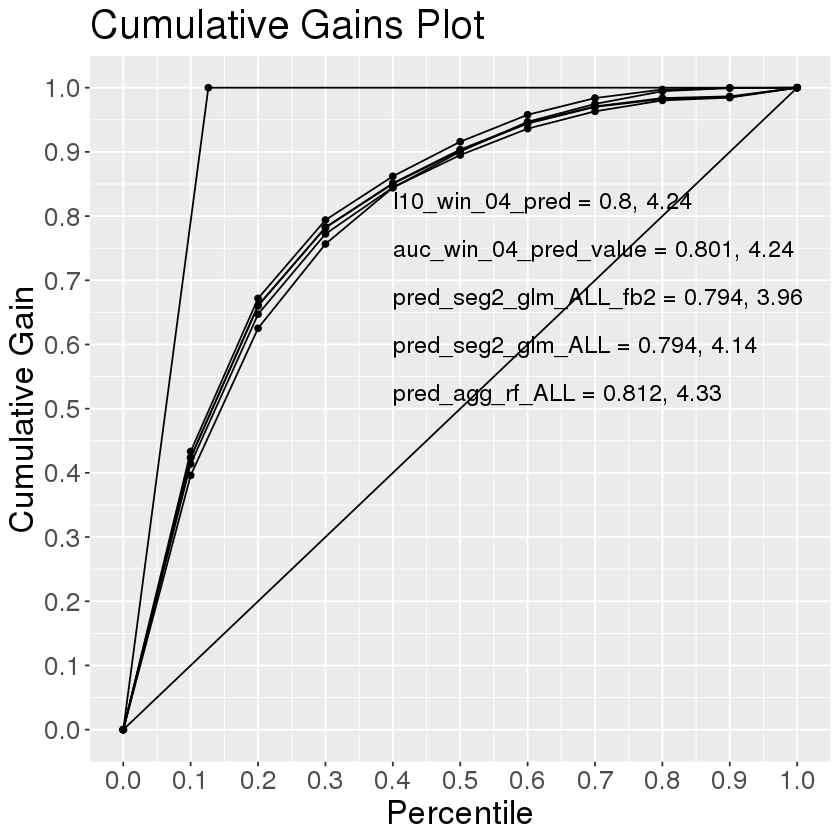

In [75]:
plot_multigains(            lift_df_list=lift_list,
                             auc_list = auc_list,
                             prop_positive = 0.1262565) 

# Compare Metrics

In [97]:
l10_df <- lapply(lift_list, function(x) x[x$P=='0.1','lift'])
l10_df
(l10_df$l10_win_04_pred-l10_df$pred_seg2_glm_ALL_fb2)/l10_df$pred_seg2_glm_ALL_fb2
(l10_df$auc_win_04_pred-l10_df$pred_seg2_glm_ALL_fb2)/l10_df$pred_seg2_glm_ALL_fb2

$l10_win_04_pred
[1] 4.237004

$auc_win_04_pred_value
[1] 4.2394

$pred_seg2_glm_ALL_fb2
[1] 3.960712

$pred_seg2_glm_ALL
[1] 4.139583

$pred_agg_rf_ALL
[1] 4.332828

[1] 0.06975806

[1] 0.0703629

In [102]:
data.frame(auc_list) 

(auc_list$l10_win_04_pred-auc_list$pred_seg2_glm_ALL_fb2)/auc_list$pred_seg2_glm_ALL_fb2
(auc_list$auc_win_04_pred-auc_list$pred_seg2_glm_ALL_fb2)/auc_list$pred_seg2_glm_ALL_fb2

l10_win_04_pred,auc_win_04_pred_value,pred_seg2_glm_ALL_fb2,pred_seg2_glm_ALL,pred_agg_rf_ALL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8000359,0.8008584,0.7938074,0.7937036,0.8115667


[1] 0.007846412

[1] 0.00888254

In [103]:
head(expiry_df_test_preds_assign)

,tld_registrar_index,reseller,reseller_country,domain_id,renewal_type,renewed_count,expiry_date,creation_date,status,domain,registrar,registrant_country,reg_period,reg_revenue,reg_arpt,renew_mbg,renewal_item_id,renew_type,autorenew_type,renewal_status,renew_date,renew_arpt,gibb_score,pattern,pattern_domain_count,⋯,pred_seg2_glm_ALL,pred_seg2_rf_ALL,reseller_geo,pred_agg_glm_ALL_fb,pred_agg_rf_ALL_fb,pred_agg_glm_fb,pred_agg_rf_fb,pred_seg_glm_ALL_fb,pred_seg_rf_ALL_fb,pred_seg2_glm_ALL_fb,pred_seg2_rf_ALL_fb,reg_arpt_org,reg_arpt_slab,pred_seg2_rf_ALL_fb2,pred_seg2_glm_ALL_fb2,pred_seg_rf_ALL_fb2,pred_seg_glm_ALL_fb2,pred_agg_rf_fb2,pred_agg_glm_fb2,pred_agg_rf_ALL_fb2,pred_agg_glm_ALL_fb2,l10_win_04_pred_model,auc_win_04_pred_model,l10_win_04_pred_value,auc_win_04_pred_value
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
1,fun1api,1API,Germany,77112544,FirstTime,1,2019-09-21,2018-09-21,Active,alparty.fun,1API,NA,1,3,3,0,233136706,auto-renewal,unrealized,Not Renewd,2019-09-21,15,3.58,alparty,1,⋯,0.4780584,0.6233142,EU,NA,NA,NA,NA,NA,NA,NA,NA,3,"(1,3]",0.211,0.211,0.211,0.211,0.211,0.211,0.211,0.211,l10_seg2_glm,auc_seg2_glm,0.4780584,0.4780584
2,fun1api,1API,Germany,118771316,FirstTime,1,2020-08-20,2019-08-20,Active,echt-geil.fun,1API,NA,1,5,5,0,329057769,renewal,NA,Renewed,2020-07-13,15,2.00,echt-geil,1,⋯,NA,0.4911790,EU,NA,NA,NA,NA,NA,NA,NA,NA,5,"(3,5]",0.350,0.350,0.350,0.350,0.350,0.350,0.350,0.350,l10_seg2_glm,auc_seg2_glm,NA,NA
3,fun1api,1API,Germany,101717674,FirstTime,1,2020-04-24,2019-04-24,Active,gotsome.fun,1API,NA,1,5,5,0,310645094,auto-renewal,unrealized,Not Renewd,2020-04-24,15,6.09,gotsome,1,⋯,0.6194136,0.6294112,EU,NA,NA,NA,NA,NA,NA,NA,NA,5,"(3,5]",0.350,0.350,0.350,0.350,0.350,0.350,0.350,0.350,l10_seg2_glm,auc_seg2_glm,0.6194136,0.6194136
4,fun1api,1API,Germany,89153032,FirstTime,1,2019-12-29,2018-12-29,Active,noor.fun,1API,NA,1,3,3,0,263535836,renewal,NA,Renewed,2019-12-08,15,5.77,noor,1,⋯,0.4426250,0.3342575,EU,NA,NA,NA,NA,NA,NA,NA,NA,3,"(1,3]",0.211,0.211,0.211,0.211,0.211,0.211,0.211,0.211,l10_seg2_glm,auc_seg2_glm,0.4426250,0.4426250
5,fun1api,1API,Germany,118627451,FirstTime,1,2020-08-19,2019-08-19,Active,laurendoesstuff.fun,1API,NA,1,5,5,0,338522944,auto-renewal,unrealized,Not Renewd,2020-08-19,15,4.83,laurendoesstuff,1,⋯,0.7268515,0.6059519,EU,NA,NA,NA,NA,NA,NA,NA,NA,5,"(3,5]",0.350,0.350,0.350,0.350,0.350,0.350,0.350,0.350,l10_seg2_glm,auc_seg2_glm,0.7268515,0.7268515
6,fun1api,1API,Germany,93057463,FirstTime,1,2020-02-07,2019-02-07,Active,bottegaveneta.fun,1API,NA,1,5,5,0,289674366,auto-renewal,realized,Renewed,2020-02-07,15,5.21,bottegaveneta,1,⋯,0.7021113,0.6055075,EU,NA,NA,NA,NA,NA,NA,NA,NA,5,"(3,5]",0.350,0.350,0.350,0.350,0.350,0.350,0.350,0.350,l10_seg2_glm,auc_seg2_glm,0.7021113,0.7021113


In [105]:
# agg_rf vs. seg2_glm Sensitivity & Specificity at cutoff of .5 and =proppos

compare_function <- function(preds_df){
    compare_df = as.data.frame(list(
        'agg_rf_0.089'=confusionMatrix(as.factor(ifelse(preds_df$pred_agg_rf_ALL > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
        'seg2_glm_fb_0.089'=confusionMatrix(as.factor(ifelse(preds_df$pred_seg2_glm_ALL_fb2 > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
        'l10_win_04_0.089'=confusionMatrix(as.factor(ifelse(preds_df$l10_win_04_pred_value > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
        'auc_win_04_0.089'=confusionMatrix(as.factor(ifelse(preds_df$auc_win_04_pred_value > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
        'agg_rf_0.500'=confusionMatrix(as.factor(ifelse(preds_df$pred_agg_rf_ALL > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
        'seg2_glm_fb_0.500'=confusionMatrix(as.factor(ifelse(preds_df$pred_seg2_glm_ALL_fb2 > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
        'l10_win_04_0.500'=confusionMatrix(as.factor(ifelse(preds_df$l10_win_04_pred_value > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass,
        'auc_win_04_0.500'=confusionMatrix(as.factor(ifelse(preds_df$auc_win_04_pred_value > 0.5, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")$byClass))
    return(compare_df)
}

# confres_list <- lapply(preds_prio_list,compare_function)
compare_function(expiry_df_test_preds_assign)

,agg_rf_0.089,seg2_glm_fb_0.089,l10_win_04_0.089,auc_win_04_0.089,agg_rf_0.500,seg2_glm_fb_0.500,l10_win_04_0.500,auc_win_04_0.500
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sensitivity,0.8354228,0.8099497,0.8292447,0.8311007,0.30032740,0.21448535,0.29414138,0.28994513
Specificity,0.7122796,0.7106180,0.7148401,0.7138091,0.97377227,0.97804163,0.97316960,0.97356348
Pos Pred Value,0.2955618,0.2879734,0.2945172,0.2942319,0.62330129,0.58531270,0.61147458,0.61157447
Neg Pred Value,0.9676909,0.9627922,0.9668448,0.9671475,0.90593969,0.89601260,0.90569374,0.90522098
Precision,0.2955618,0.2879734,0.2945172,0.2942319,0.62330129,0.58531270,0.61147458,0.61157447
Recall,0.8354228,0.8099497,0.8292447,0.8311007,0.30032740,0.21448535,0.29414138,0.28994513
F1,0.4366444,0.4248822,0.4346594,0.4346028,0.40534569,0.31393174,0.39721027,0.39338698
Prevalence,0.1262565,0.1262565,0.1255369,0.1255369,0.12625647,0.12625647,0.12553692,0.12553692
Detection Rate,0.1054775,0.1022614,0.1041008,0.1043338,0.03791828,0.02708016,0.03692560,0.03639882


In [109]:
x = compare_function(expiry_df_test_preds_assign)

cat("True Positive Improvement via L10 assignment  @ 0.089 cutoff")
(x['Sensitivity','l10_win_04_0.089']-
                                  x['Sensitivity','seg2_glm_fb_0.089'])/x['Sensitivity','seg2_glm_fb_0.089']

cat("\n\nTrue Positive Improvement via L10 assignment  @ 0.500 cutoff")
(x['Sensitivity','l10_win_04_0.500']-
                                  x['Sensitivity','seg2_glm_fb_0.500'])/x['Sensitivity','seg2_glm_fb_0.089']
       
cat("\n\nTrue Positive Improvement via AUC assignment  @ 0.089 cutoff")
(x['Sensitivity','auc_win_04_0.089']-
                                  x['Sensitivity','seg2_glm_fb_0.089'])/x['Sensitivity','seg2_glm_fb_0.089']

cat("\n\nTrue Positive Improvement via AUC assignment  @ 0.500 cutoff")
(x['Sensitivity','auc_win_04_0.500']-
                                  x['Sensitivity','seg2_glm_fb_0.500'])/x['Sensitivity','seg2_glm_fb_0.089']
  

True Positive Improvement via L10 assignment  @ 0.089 cutoff

[1] 0.02382244



True Positive Improvement via L10 assignment  @ 0.500 cutoff

[1] 0.09834689



True Positive Improvement via AUC assignment  @ 0.089 cutoff

[1] 0.02611399



True Positive Improvement via AUC assignment  @ 0.500 cutoff

[1] 0.09316601

# Examining how variables of high importance differ between classes in training & test data

In [84]:
var_imp <- as.data.frame(list(imp_l10=importance(model_l10), 
                              imp_auc=importance(model_auc)))  %>% arrange(desc(imp_l10))
# var_imp$var <- row.names(var_imp)
# row.names(var_imp) <- NULL
# var_imp <- var_imp %>% arrange(desc(imp))
head(var_imp,10)

,imp_l10,imp_auc
,<dbl>,<dbl>
n,31.75366,30.72497
gibbs_rng,23.26031,19.52434
sldlen_kurt,22.90408,24.48538
daydom_rng,21.44615,21.87291
daydom_max,16.89406,16.63842
gibbs_max,15.29106,10.51729
ren_prp,13.16063,20.22859
daydom_kurt,12.83814,26.50903
gibbs_kurt,12.79085,18.07617


In [86]:
train %>% 
  group_by(auc_win_04) %>%
  summarize(mean_n = mean(n), 
           mean_gibbs_rng = mean(gibbs_rng),
           mean_sldlen_kurt = mean(sldlen_kurt),
           mean_daydom_rng = mean(daydom_rng),
           mean_daydom_max = mean(daydom_max),
           mean_gibbs_max = mean(gibbs_max),
           mean_ren_prp = mean(ren_prp),
           mean_daydom_kurt = mean(daydom_kurt),
           mean_gibbs_kurt = mean(gibbs_kurt),
           mean_daydom_mean = mean(daydom_mean)
           ) %>% t()

`summarise()` ungrouping output (override with `.groups` argument)



auc_win_04,auc_agg_rf_ALL,auc_seg2_glm,auc_seg2_glm_fb
mean_n,1471.4252,105.9897,29.9680
mean_gibbs_rng,42.81494,15.44507,21.77784
mean_sldlen_kurt,2.6127300,-0.6754634,0.1395763
mean_daydom_rng,521.97047,46.65201,8.63200
mean_daydom_max,524.00197,48.10608,9.64000
mean_gibbs_max,43.39378,17.80871,22.93048
mean_ren_prp,0.2806437,0.3946055,0.3890438
mean_daydom_kurt,2.0975765,-0.5600047,0.2552572
mean_gibbs_kurt,56.352897,11.363191,2.979369
mean_daydom_mean,190.287148,20.999453,3.707608


In [87]:
train %>% 
  group_by(l10_win_04) %>%
  summarize(mean_n = mean(n), 
           mean_gibbs_rng = mean(gibbs_rng),
           mean_sldlen_kurt = mean(sldlen_kurt),
           mean_daydom_rng = mean(daydom_rng),
           mean_daydom_max = mean(daydom_max),
           mean_gibbs_max = mean(gibbs_max),
           mean_ren_prp = mean(ren_prp),
           mean_daydom_kurt = mean(daydom_kurt),
           mean_gibbs_kurt = mean(gibbs_kurt),
           mean_daydom_mean = mean(daydom_mean)
           ) %>% t()

`summarise()` ungrouping output (override with `.groups` argument)



l10_win_04,l10_agg_rf_ALL,l10_seg2_glm,l10_seg2_glm_fb
mean_n,1862.91969,116.91719,38.39394
mean_gibbs_rng,49.32479,16.72014,21.52848
mean_sldlen_kurt,3.5601528,-0.6287673,0.7303890
mean_daydom_rng,655.96632,50.82285,9.30303
mean_daydom_max,658.21503,52.23585,10.30303
mean_gibbs_max,49.79671,18.84135,22.42879
mean_ren_prp,0.2574651,0.3905533,0.3675474
mean_daydom_kurt,2.3917029,-0.2916554,0.2974898
mean_gibbs_kurt,70.82100,10.62390,4.71722
mean_daydom_mean,241.889724,20.670345,4.135719
